In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import sympy
import math

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


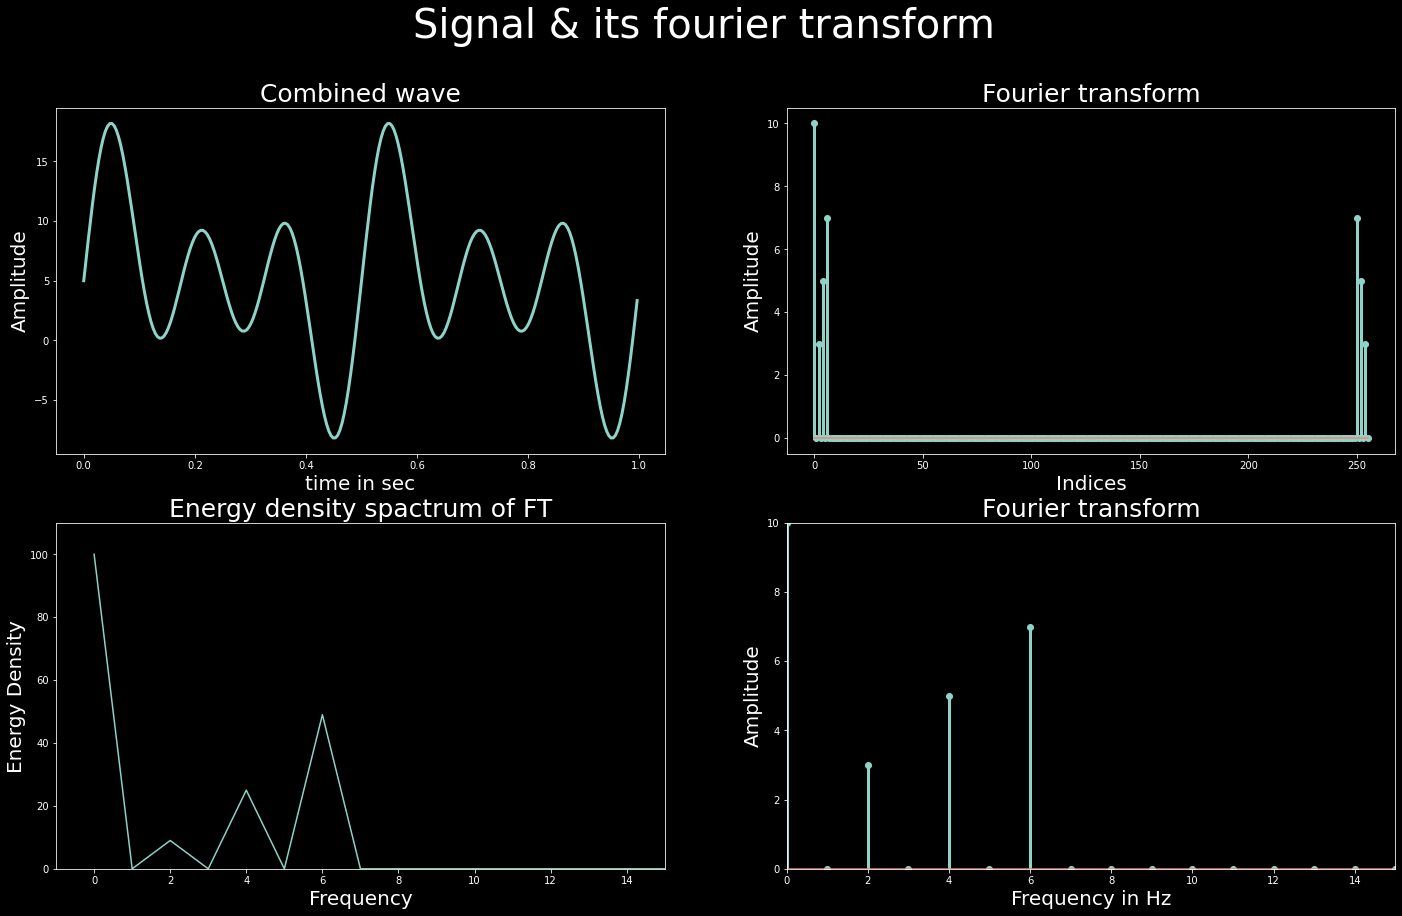

In [ ]:
#task1
srate=256
t=np.arange(0.,1.,1/srate)
x1=3*np.sin(2*np.pi*2*t)
x2=5*np.sin(2*np.pi*4*t)
x3=7*np.sin(2*np.pi*6*t)
DC=5
x4=DC+x1+x2+x3

#plot signal & fourier transform

plt.figure(figsize=(24,14))
plt.suptitle('Signal & its fourier transform',fontsize=40)
style.use('dark_background')

plt.subplot(2,2,1)
plt.plot(t,x4,linewidth=3)
plt.title("Combined wave",fontsize=25)
plt.xlabel('time in sec',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)


#initialize fourier coefficient
X=np.zeros(len(x4),dtype=complex)

for freq in range(0,len(t)):
  #create complex sin wave & compute dot product with signal
  csw=np.exp(-1j*2*np.pi*freq*t)
  X[freq]=np.sum(np.multiply(x4,csw))

#extract amplitude
amps=2*np.abs(X)/len(t)

#in the above line of code we multiply by 2 to incorporate the negative frequencies
#of complex sinusoidal

Nyquist=srate/2
Hz=np.linspace(0,Nyquist,math.floor(len(t)/2+1))

#Indices VS Amplitude plot of FT
plt.subplot(2,2,2)
markerline,stemlines,baseline=plt.stem(amps)
plt.setp(stemlines,'linewidth',3)
plt.title("Fourier transform",fontsize=25)
plt.xlabel('Indices',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)

#energy density calculation =amps**2
energy=np.abs(amps)**2


#Energy density spactrum plot of FT
plt.subplot(2,2,3)
plt.plot(Hz,energy[range(0,len(Hz))])
plt.xlim(-1,15)
plt.ylim(0,110)
plt.title("Energy density spactrum of FT",fontsize=25)
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Energy Density',fontsize=20)

#Frequency VS Amplitude plot of FT
plt.subplot(2,2,4)
markerline,stemlines,baseline=plt.stem(Hz,amps[range(0,len(Hz))])
plt.setp(stemlines,'linewidth',3)
plt.xlim(0,15)
plt.ylim(0,10)
plt.title("Fourier transform",fontsize=25)
plt.xlabel('Frequency in Hz',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.show()
